# DSCI 503 – Project 04

### Felix Asare


In [31]:
# Importing  numpy, pandas, and matplotlib.pyplot. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train_test_split, OneHotEncoder, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Part 1: Loading the Dataset; Preliminary Analysis 
Preliminary Analysis on the data


In [32]:
# Loading the forest_cover.txt file into a DataFrame

fc = pd.read_csv('forest_cover.txt', sep='\t')

# Displaying the first 5 rows of the DataFrame
print(fc.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

Determining the size of the dataset

In [33]:
# Displaying the shape of the DataFrame
fc.shape

(15120, 13)

In [34]:
# Selecting the Cover_Type column from fc, then call its value_counts() method and sort_index()
fc['Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

Creating lists of colors as color palette

In [35]:
#Creating color palette for plotting
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']


## Part 2: Distribution of Cover Type by Wilderness Area

Determining the distribution of the wilderness areas within our dataset.

In [36]:
# select the Wilderness_Area column from fc, then call its value_counts() method, followed by the sort_index()
fc['Wilderness_Area'].value_counts().sort_index()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

Creating a DataFrame to determine how many regions of each cover type are in each of the four wilderness areas

In [37]:
# Use pd.crosstab() to count the number of regions of each cover type that are in each of the four wilderness areas.
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Visually representing the ct_by_wa DataFrame 

In [38]:
# Creating a DataFrame named ct_by_wa_props by dividing ct_by_wa by the column sums of ct_by_wa. Using np.sum() to sum the columns of ct_by_wa.
ct_by_wa_props = ct_by_wa / np.sum(ct_by_wa)

/Users/asare/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


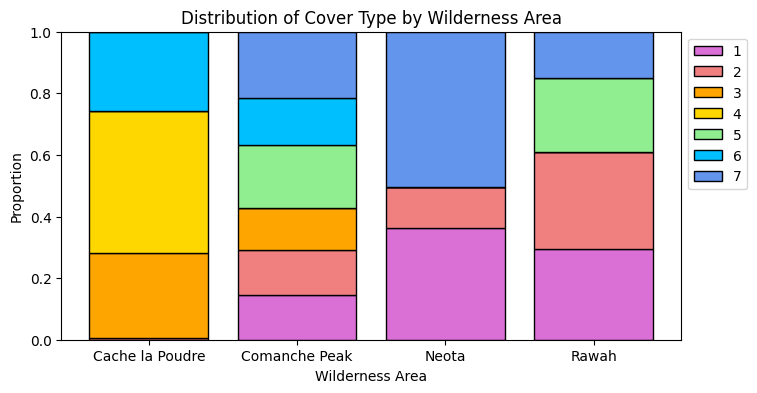

In [39]:
# creating a stacked bar chart of ct_by_wa_props
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

# Plotting the stacked bar chart
# Figure size
plt.figure(figsize=(8, 4))

# Loop over the rows of ct_by_wa_props.
for i in range(len(ct_by_wa_props)):
    plt.bar(ct_by_wa_props.columns, ct_by_wa_props.iloc[i], bottom=bb.iloc[i], color=palette[i], edgecolor='black', label=ct_by_wa_props.index[i])

plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



## Part 3: Distribution of Cover Type by Soil Type

Creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types.

In [40]:
# Use pd.crosstab() to count the number of regions of each cover type there are for each of the 40 soil types.

ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])

ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Visually representing the ct_by_st DataFrame

In [41]:
# Creating DataFrame ct_by_st_props
ct_by_st_props = ct_by_st / np.sum(ct_by_st)

/Users/asare/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


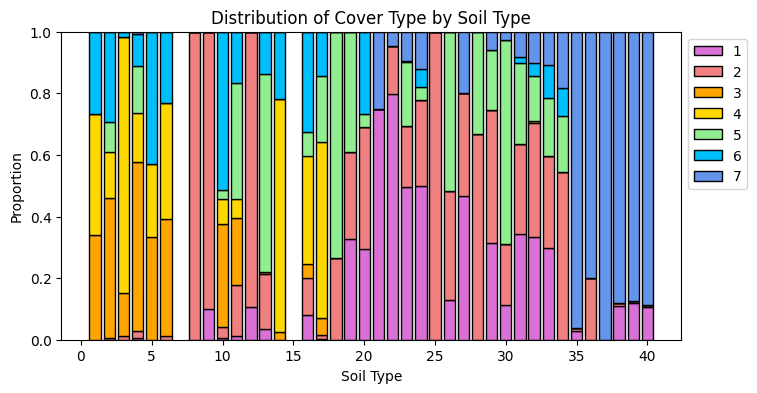

In [42]:
# Creating a stacked bar chart of ct_by_st_props
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

# Plotting the stacked bar chart
plt.figure(figsize=(8, 4))

for i in range(len(ct_by_st_props)):
    plt.bar(ct_by_st_props.columns, ct_by_st_props.iloc[i], bottom=bb.iloc[i], color=palette[i], edgecolor='black', label=ct_by_st_props.index[i])

plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Part 4: Distribution of Elevation by Cover Type

Start by calculating the average elevation for each of the seven cover types


In [43]:
# Select the Elevation and Cover_Type columns from fc, group the rows by Cover_Type, and then calculate the mean Elevation for each group.
fc.groupby('Cover_Type')['Elevation'].mean()

Cover_Type
1    3128.025926
2    2922.540278
3    2398.423148
4    2223.420370
5    2786.801389
6    2423.276852
7    3362.769907
Name: Elevation, dtype: float64

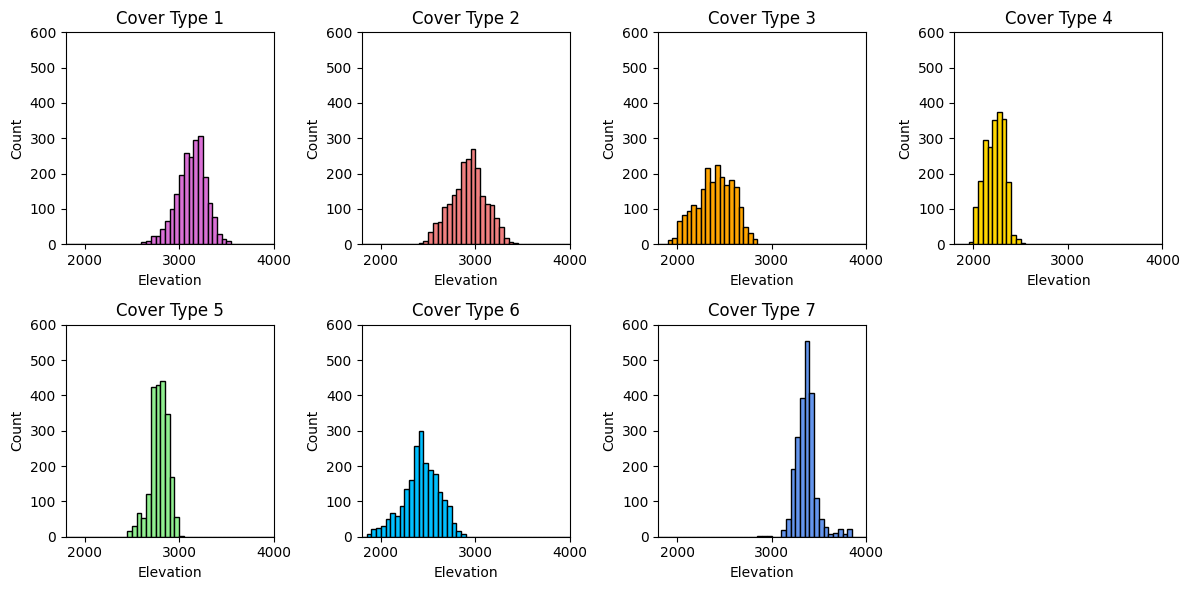

In [44]:
# histograms to visually explore the distribution of elevations for each of the seven cover types.
plt.figure(figsize=(12, 6))


for i in range(1, 8):
    plt.subplot(2, 4, i)
    plt.hist(fc[fc['Cover_Type'] == i]['Elevation'], bins=np.arange(1800, 4050, 50), color=palette[i-1], edgecolor='black')
    plt.title(f'Cover Type {i}')
    plt.xlim(1800, 4000)
    plt.ylim(0, 600)
    plt.xlabel('Elevation')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets

Starting by seperating categorical features, numerical features and the labels

In [45]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Elevation                           15120 non-null  int64 
 1   Aspect                              15120 non-null  int64 
 2   Slope                               15120 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64 
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64 
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64 
 6   Hillshade_9am                       15120 non-null  int64 
 7   Hillshade_Noon                      15120 non-null  int64 
 8   Hillshade_3pm                       15120 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64 
 10  Wilderness_Area                     15120 non-null  object
 11  Soil_Type                           15120 non-null  in

In [46]:
# Create a 2D array named X_num by selecting the columns of fc that represent numerical features.
X_num = fc[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].values

# Create a 2D array named X_cat by selecting the columns of fc that represent categorical features.
X_cat = fc[['Wilderness_Area', 'Soil_Type']].values

# Create a 1D array named y by selecting the Cover_Type column of fc.
y = fc['Cover_Type'].values

# Print the shape of X_num, X_cat, and y.
print('Numerical Feature Array Share:   ', X_num.shape)
print('Categorical Feature Array Shape: ', X_cat.shape)
print('Label Array Shape:              ', y.shape)


Numerical Feature Array Share:    (15120, 10)
Categorical Feature Array Shape:  (15120, 2)
Label Array Shape:               (15120,)


Using OneHotEncoding to encode categorical variables

In [47]:
# Create a OneHotEncoder() object setting sparse=False.
ohe = OneHotEncoder(sparse_output=False)

# Fit the encoder to the categorical features.
X_enc = ohe.fit_transform(X_cat)

# Print the shape of X_enc.
print('Encoded Feature Array Shape: ', X_enc.shape)

Encoded Feature Array Shape:  (15120, 42)


Combining Numerical features with the encoded Categorical features

In [49]:
# Using hstack() to concatenate X_num and X_enc, and assign the result to X.
X = np.hstack((X_num, X_enc))

# Print the shape of X.
print('Feature Array Shape: ', X.shape)

Feature Array Shape:  (15120, 52)


Splitting the data  into training, validation, and test sets, using a 70/15/15

In [ ]:
# Use train_test_split() to split the data into training and holdout sets using an 70/30 split. Name the resulting arrays X_train, X_hold, y_train, and y_hold. Set random_state=1. Use stratified sampling
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Use train_test_split() to split the holdout data into validation and test sets using a 50/50 split. Name the resulting arrays X_valid, X_test, y_valid, and y_test. Set random_state=1. Use stratified sampling.
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

# Print the shapes of X_train, X_valid, and X_test.
print('Training Features Shape:  ', X_train.shape)
print('Validation Features Shape:', X_valid.shape)
print('Test Features Shape:      ', X_test.shape)


Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Part 6: Logistic Regression Model
Crerating and evaluating a model with Logistic Regression Model

In [ ]:
# Create a logistic regression model named lr_mod setting solver='lbfgs', max_iter=1000, and multi_class='multinomial'. Set penalty='none'.
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty='l2')

# Fit the model to the training data.
lr_mod.fit(X_train, y_train)

# Calculate the training and validation accuracy of the model.
train_acc = lr_mod.score(X_train, y_train)
valid_acc = lr_mod.score(X_valid, y_valid)

# Print the training and validation accuracy.
print('Training Accuracy:  ', train_acc)
print('Validation Accuracy:', valid_acc)


/Users/asare/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy:   0.6084656084656085
Validation Accuracy: 0.6168430335097002


/Users/asare/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models

Creating and evaluation several Decision Tree Models

In [ ]:
# Create empty lists named dt_train_acc and dt_valid_acc. set the random_state=1.
dt_train_acc = []
dt_valid_acc = []

# Loop over the range of 2 to 30.
depth_range = range(2, 31)
for i in depth_range:
    # Create a decision tree model named temp_tree setting max_depth=i.
    temp_tree = DecisionTreeClassifier(max_depth=i, random_state=1)
    
    # Fit the model to the training data.
    temp_tree.fit(X_train, y_train)
    
    # Calculate the training and validation accuracy of the model.
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))


# Use np.argmax to determine the index of the maximum value in dt_valid_acc. Store the result in dt_idx.
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

# Use dt_idx with the lists dt_train_acc and dt_valid_acc to determine the training and validation accuracies for the optimal model found.
dt_train_opt = dt_train_acc[dt_idx]
dt_valid_opt = dt_valid_acc[dt_idx]

# Print the optimal depth and the training and validation accuracies for the optimal model.
print('Optimal Value for Max Depth:         ', dt_opt_depth)
print('Training Accuracy for Optimal Model: ', dt_train_opt)
print('Validation Accuracy for Optimal Model:', dt_valid_opt)

Optimal Value for Max Depth:          18
Training Accuracy for Optimal Model:  0.9804421768707483
Validation Accuracy for Optimal Model: 0.7716049382716049


Creating a line plot to visualize the optimized max_depth curve

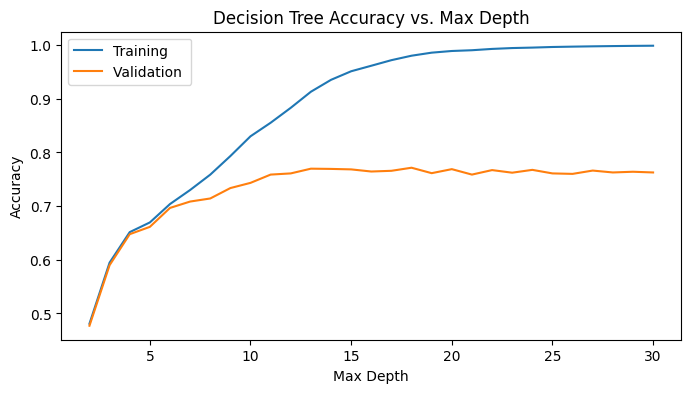

In [ ]:
# Creating a plot to visualize max depth vs. accuracy
plt.figure(figsize=(8, 4))
plt.plot(depth_range, dt_train_acc, label='Training ')
plt.plot(depth_range, dt_valid_acc, label='Validation ')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.show()

## Part 8: Random Forest Models

Creating and evaluating the Random Forest Model

In [ ]:
# Create empty lists named rf_train_acc and rf_valid_acc. Set random_state=1.
rf_train_acc = []
rf_valid_acc = []

# Create a decision tree model named temp_forest with max_depth equal to the current value from depth_range that is being considered. Set the parameter n_estimators to 100.

for i in depth_range:
    temp_forest = RandomForestClassifier(max_depth=i, n_estimators=100, random_state=1)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))


# Use np.argmax to determine the index of the maximum value in rf_valid_acc. Store the result in rf_idx
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

# Use rf_idx with the lists rf_train_acc and rf_valid_acc to determine the training and validation accuracies for the optimal model found.
rf_train_opt = rf_train_acc[rf_idx]
rf_valid_opt = rf_valid_acc[rf_idx]

# Print the optimal depth and the training and validation accuracies for the optimal model.
print('Optimal Value for Max Depth:          ', rf_opt_depth)
print('Training Accuracy for Optimal Model:  ', rf_train_opt)
print('Validation Accuracy for Optimal Model:', rf_valid_opt)

Optimal Value for Max Depth:          28
Training Accuracy for Optimal Model:  1.0
Validation Accuracy for Optimal Model: 0.8655202821869489


Creating a plot to visualize the training and validation curves of max_depth

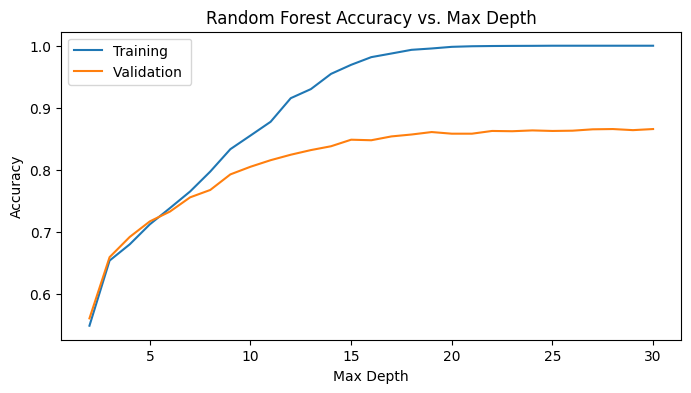

In [ ]:
# Creating a plot to visualize max depth vs. accuracy
plt.figure(figsize=(8, 4))
plt.plot(depth_range, rf_train_acc, label='Training ')
plt.plot(depth_range, rf_valid_acc, label='Validation ')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model
Creating and Evaluating the best model out of Logistic Regression, Decision Tree and Random Forest

In [ ]:
# Recreating the best model using the optimal depth found
final_model = RandomForestClassifier(max_depth=rf_opt_depth, n_estimators=100, random_state=1)

# Fitting the model to the training data
final_model.fit(X_train, y_train)

# Printing the training and validation and testing accuracy of the model
train_acc = final_model.score(X_train, y_train)
valid_acc = final_model.score(X_valid, y_valid)
test_acc = final_model.score(X_test, y_test)

print('Training Accuracy for Final Model:  ', train_acc)
print('Validation Accuracy for Final Model:', valid_acc)
print('Testing Accuracy for Final Model:   ', test_acc)




Training Accuracy for Final Model:   1.0
Validation Accuracy for Final Model: 0.8655202821869489
Testing Accuracy for Final Model:    0.8624338624338624


Creating and displaying a confusion matrix detailing the models performance

In [ ]:
# Creating a confusion matrix for the final model and displaying result as a DataFrame
y_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=range(1, 8), columns=range(1, 8))
print('Confusion Matrix:')
print(cm_df)


Confusion Matrix:
     1    2    3    4    5    6    7
1  237   63    2    0    5    0   17
2   52  242    6    0   13    8    3
3    0    1  263   18    2   40    0
4    0    0    6  313    0    5    0
5    0   12    4    0  303    5    0
6    0    0   31    9    1  283    0
7    9    0    0    0    0    0  315


Generating a classification report to provide further insight to the models performance on the test set

In [ ]:
# Creating a classification report for the final model
cr = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr)


Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.73      0.76       324
           2       0.76      0.75      0.75       324
           3       0.84      0.81      0.83       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.87      0.85       324
           7       0.94      0.97      0.96       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

